# 0. Set Up Environment and Download Data

In [39]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

In [40]:
# read data in csv format from the provided url
url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
df = pd.read_csv(url)
# check dataframe
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


# 1. Data Analyses and Cleansing

In [41]:
# check shape
df.shape

(15547, 5)

In [42]:
# quick check on dataframe statistic summary
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


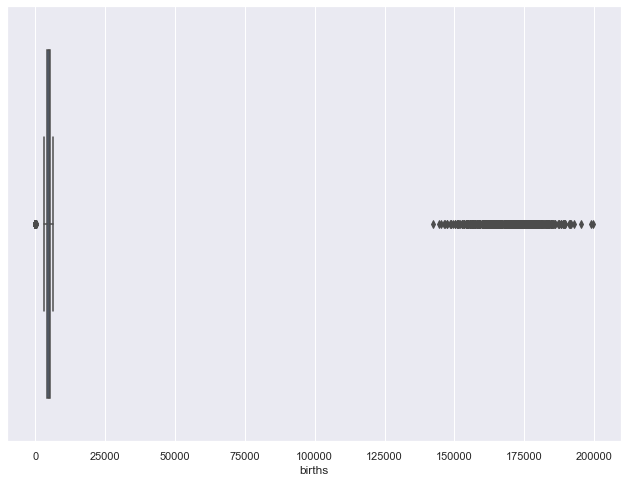

In [43]:
# check of data distribution
# there are a lot of outliners with very big birth rate per day
plt.figure(figsize=(11,8))
sns.boxplot(df.births)
plt.show()

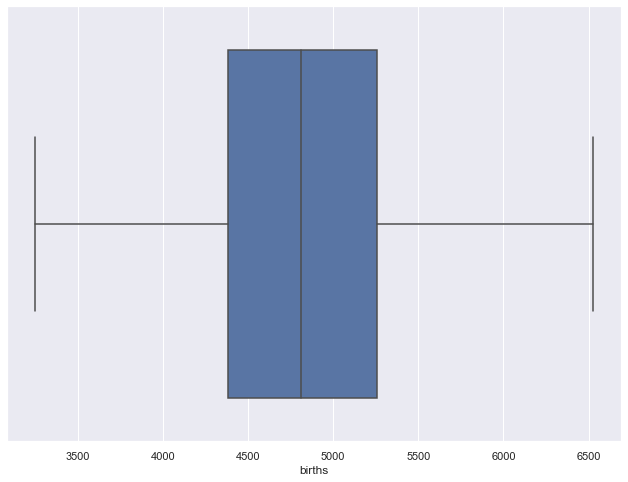

In [45]:
# clean up outliners
df = df[(df.births>1000) & (df.births<100000)]
plt.figure(figsize=(11,8))
sns.boxplot(df.births)
plt.show()

In [33]:
# check if there is still null values
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [57]:
df.year//10 * 10

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15062    1980
15063    1980
15064    1980
15065    1980
15066    1980
Name: year, Length: 14610, dtype: int64

In [58]:
# add a date column (datetime object)
df.insert(0, 'date', pd.to_datetime(df[['year', 'month', 'day']]))
# add a decade column (1960, 1970 and 1980)
df.insert(1, 'decades', df.year//10 * 10)
# add a weekday column for aggregating birth rate later according day of week 
df.insert(2, 'weekday', df.date.dt.day_name())
df.head()

,date,decades,weekday,year,month,day,gender,births
0,1969-01-01,1960,Wednesday,1969,1,1.0,F,4046
1,1969-01-01,1960,Wednesday,1969,1,1.0,M,4440
2,1969-01-02,1960,Thursday,1969,1,2.0,F,4454
3,1969-01-02,1960,Thursday,1969,1,2.0,M,4548
4,1969-01-03,1960,Friday,1969,1,3.0,F,4548


In [59]:
# drop useless columns
df.drop(['year', 'month', 'day', 'gender'], axis=1, inplace=True)
df.head()

,date,decades,weekday,births
0,1969-01-01,1960,Wednesday,4046
1,1969-01-01,1960,Wednesday,4440
2,1969-01-02,1960,Thursday,4454
3,1969-01-02,1960,Thursday,4548
4,1969-01-03,1960,Friday,4548


In [74]:
# set an ordered weekday list
ordered_weekday = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', \
                   'Saturday', 'Sunday']
# aggregate birth rate by weekday then reset index according to the ordered_weekday list
df_weekday = df.groupby(['weekday', 'decades']).sum().reindex(ordered_weekday, level=0)
df_weekday

births
weekday   decades         
Monday    1960      526638
          1970     4895418
          1980     4949739
Tuesday   1960      549754
          1970     5090433
          1980     5173612
Wednesday 1960      537910
          1970     4949892
          1980     5045584
Thursday  1960      517742
          1970     4903588
          1980     5013476
Friday    1960      531220
          1970     4992508
          1980     5069502
Saturday  1960      483710
          1970     4392927
          1980     4214867
Sunday    1960      451604
          1970     4154367
          1980     4041017

In [85]:
# set an ordered weekday list
ordered_weekday = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', \
                   'Saturday', 'Sunday']
# create a pivot table showing birth right of the decades and day of week
df_births_per_day = df.pivot_table('births', index='weekday', columns='decades', \
                                aggfunc='sum').reindex(ordered_weekday)
df_births_per_day

decades,1960,1970,1980
weekday,,,
Monday,526638,4895418,4949739
Tuesday,549754,5090433,5173612
Wednesday,537910,4949892,5045584
Thursday,517742,4903588,5013476
Friday,531220,4992508,5069502
Saturday,483710,4392927,4214867
Sunday,451604,4154367,4041017


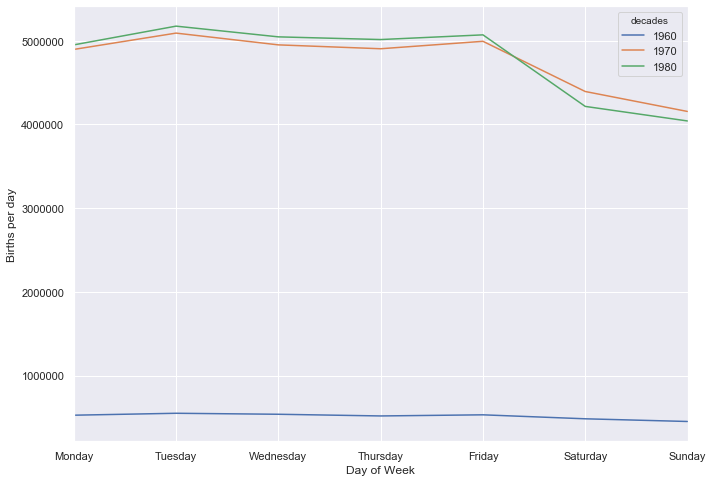

In [88]:
# plot graph
df_births_per_day.plot(figsize=(11,8))
plt.xlabel('Day of Week')
plt.ylabel('Births per day')
plt.show()

Since the number of births in 1960s is very low, probably due to missing data, we take a look at the MEAN number of births

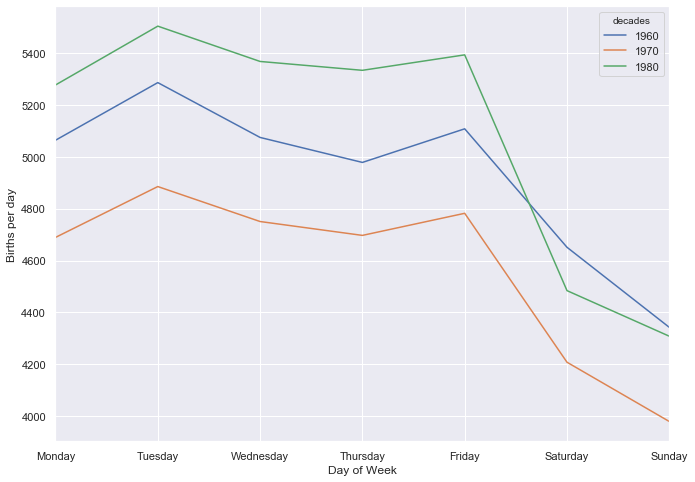

In [91]:
# create a pivot table showing MEAN birth right of the decades and day of week
df_births_per_day_mean = df.pivot_table('births', index='weekday', columns='decades', \
                                        aggfunc='mean').reindex(ordered_weekday)
# plot graph
df_births_per_day_mean.plot(figsize=(11,8))
plt.xlabel('Day of Week')
plt.ylabel('Births per day')
plt.show()